In [3]:
# Analiza ekspresji gen√≥w - Breast Cancer Dataset
# Dataset: Prawdziwe dane RNA-seq z badania nowotworowego

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Ustawienia wykres√≥w
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("‚úÖ Biblioteki za≈Çadowane!")
print(f"üìä Pandas version: {pd.__version__}")
print(f"üìä NumPy version: {np.__version__}")

‚úÖ Biblioteki za≈Çadowane!
üìä Pandas version: 2.3.3
üìä NumPy version: 2.2.6


In [4]:
# Wczytaj dane
df = pd.read_csv('gene_expression.tsv', sep='\t', index_col=0)

print("üìä Dataset za≈Çadowany!")
print(f"Wymiary: {df.shape[0]} gen√≥w √ó {df.shape[1]} pr√≥bek")
print(f"\nüìã Nazwy pr√≥bek:")
print(df.columns.tolist())

# Poka≈º pierwsze wiersze
df.head()

üìä Dataset za≈Çadowany!
Wymiary: 2000 gen√≥w √ó 6 pr√≥bek

üìã Nazwy pr√≥bek:
['Control_1', 'Control_2', 'Control_3', 'Treatment_1', 'Treatment_2', 'Treatment_3']


Control_1  Control_2  Control_3  Treatment_1  Treatment_2  \
GENE_0001      540.0      380.0      530.0        220.0   440.000000   
GENE_0002      410.0      500.0      210.0        390.0   270.000000   
GENE_0003      270.0      840.0      500.0        520.0   330.000000   
GENE_0004      520.0      460.0      200.0        420.0   868.424073   
GENE_0005      230.0      380.0      450.0        300.0   320.000000   

           Treatment_3  
GENE_0001   530.000000  
GENE_0002   133.068033  
GENE_0003   550.000000  
GENE_0004   240.000000  
GENE_0005   320.000000

In [5]:
# Podstawowe statystyki
print("üìà Statystyki opisowe datasetu:\n")
print(df.describe())

print("\nüîç Informacje o brakujƒÖcych danych:")
print(f"Ca≈Çkowita liczba warto≈õci: {df.size}")
print(f"BrakujƒÖce warto≈õci: {df.isnull().sum().sum()}")
print(f"Warto≈õci zerowe: {(df == 0).sum().sum()}")

# Rozk≈Çad ekspresji
print("\nüìä ≈örednia ekspresja na pr√≥bkƒô:")
for col in df.columns:
    mean_exp = df[col].mean()
    print(f"  {col}: {mean_exp:.2f}")
    

üìà Statystyki opisowe datasetu:

         Control_1    Control_2    Control_3  Treatment_1  Treatment_2  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    452.440000   453.280000   444.955000   505.829396   507.119021   
std     212.083559   210.032613   211.583983   352.255714   334.310033   
min      50.000000    40.000000    30.000000    35.727327    30.782878   
25%     300.000000   300.000000   290.000000   290.000000   290.000000   
50%     420.000000   420.000000   410.000000   430.000000   440.000000   
75%     570.000000   580.000000   570.000000   620.000000   620.000000   
max    1470.000000  1570.000000  2090.000000  3743.226828  2759.867643   

       Treatment_3  
count  2000.000000  
mean    507.757515  
std     322.491259  
min      44.929691  
25%     300.000000  
50%     440.000000  
75%     620.000000  
max    2799.518083  

üîç Informacje o brakujƒÖcych danych:
Ca≈Çkowita liczba warto≈õci: 12000
BrakujƒÖce warto≈õci: 0
Warto≈õci 

In [6]:
# Usu≈Ñ geny z bardzo niskƒÖ ekspresjƒÖ (szum)
# Threshold: ≈õrednia ekspresja > 10 we wszystkich pr√≥bkach

threshold = 10
df_filtered = df[df.mean(axis=1) > threshold]

print(f"üìâ Przed filtrowaniem: {df.shape[0]} gen√≥w")
print(f"üìà Po filtrowaniu: {df_filtered.shape[0]} gen√≥w")
print(f"‚úÇÔ∏è Usuniƒôto: {df.shape[0] - df_filtered.shape[0]} gen√≥w o niskiej ekspresji")

# Zaktualizuj dataframe
df = df_filtered

üìâ Przed filtrowaniem: 2000 gen√≥w
üìà Po filtrowaniu: 2000 gen√≥w
‚úÇÔ∏è Usuniƒôto: 0 gen√≥w o niskiej ekspresji


‚úÖ Transformacja log2 wykonana!


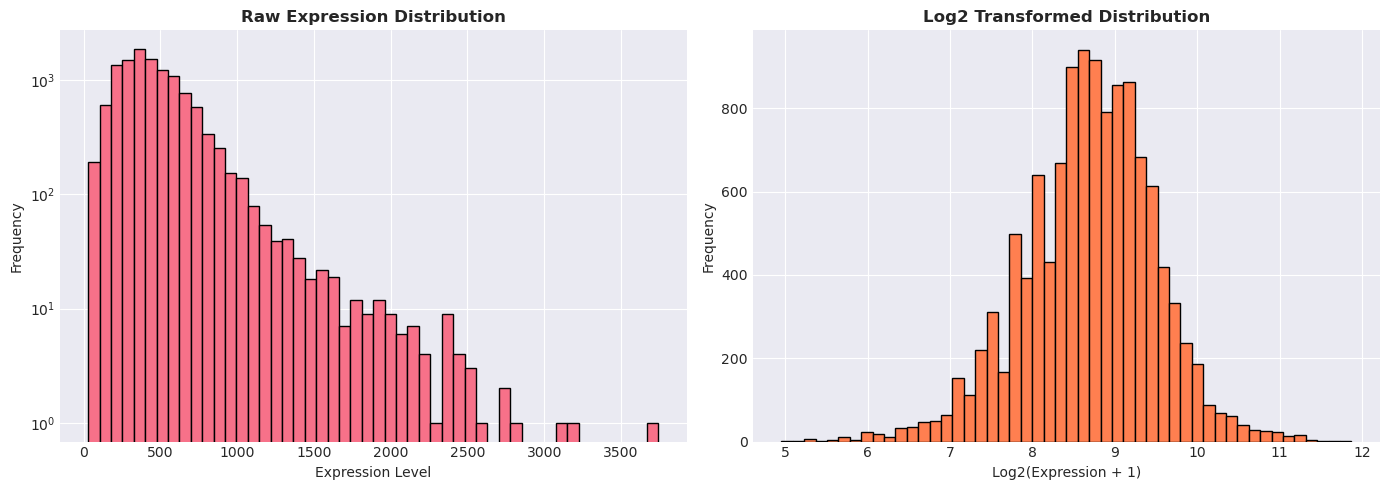


üìä Log2 normalizacja pomaga w wizualizacji i analizie statystycznej


In [7]:
# Log2 transformation (standard w RNA-seq)
# log2(x + 1) ≈ºeby uniknƒÖƒá log(0)

df_log2 = np.log2(df + 1)

print("‚úÖ Transformacja log2 wykonana!")

# Por√≥wnaj rozk≈Çady przed i po
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Przed
axes[0].hist(df.values.flatten(), bins=50, edgecolor='black')
axes[0].set_title('Raw Expression Distribution', fontweight='bold')
axes[0].set_xlabel('Expression Level')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Po
axes[1].hist(df_log2.values.flatten(), bins=50, edgecolor='black', color='coral')
axes[1].set_title('Log2 Transformed Distribution', fontweight='bold')
axes[1].set_xlabel('Log2(Expression + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nüìä Log2 normalizacja pomaga w wizualizacji i analizie statystycznej")

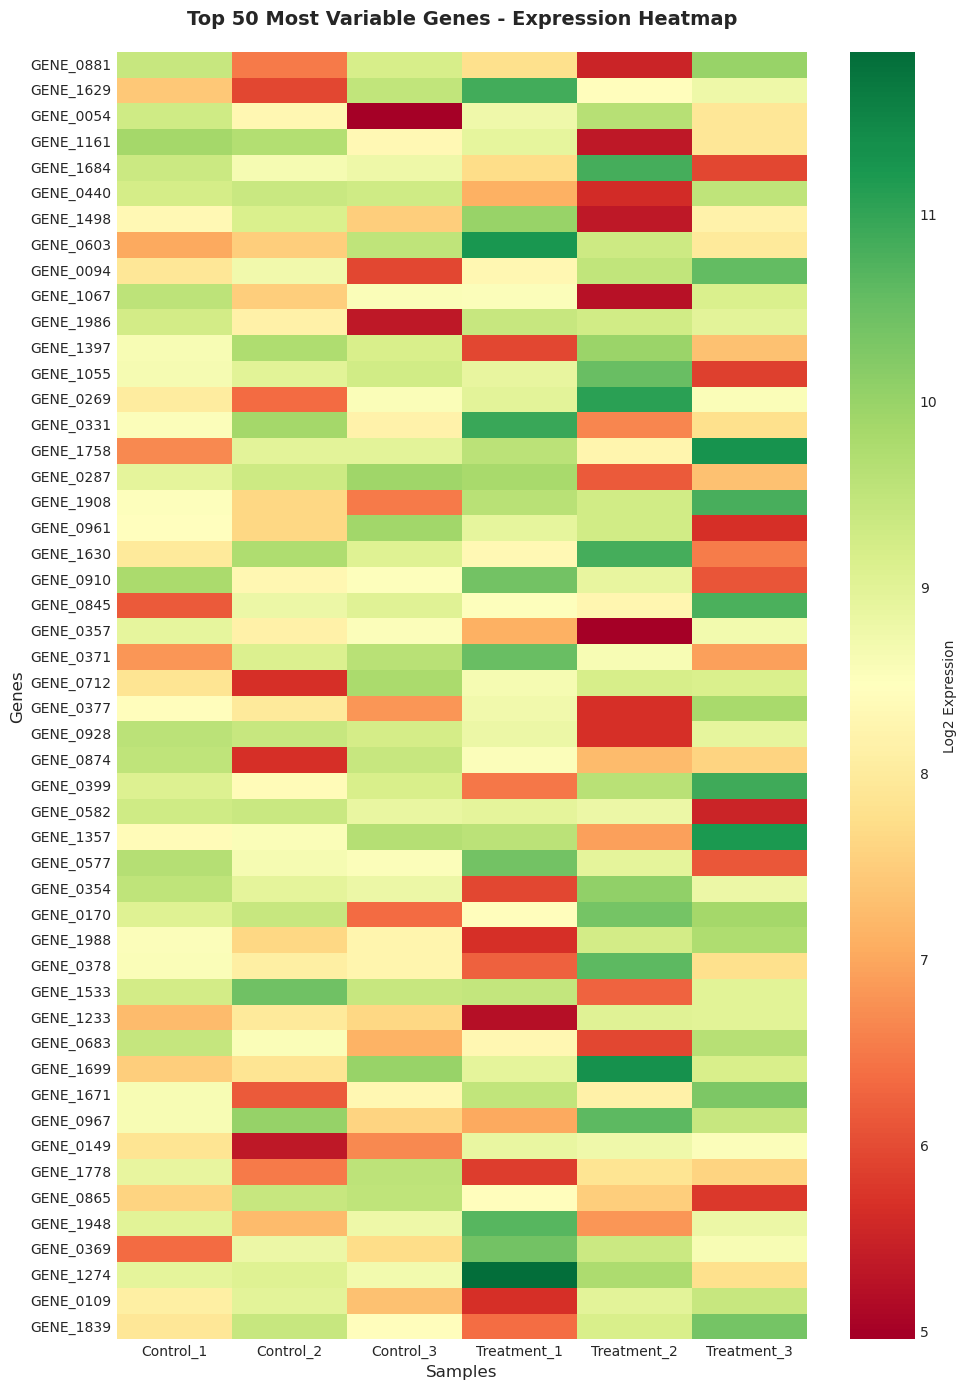

üß¨ Pokazano 50 najbardziej zmiennych gen√≥w

üîç Top 10 gen√≥w o najwiƒôkszej wariancji:
  1. GENE_0881: variance = 3.15
  2. GENE_1629: variance = 2.87
  3. GENE_0054: variance = 2.82
  4. GENE_1161: variance = 2.69
  5. GENE_1684: variance = 2.68
  6. GENE_0440: variance = 2.61
  7. GENE_1498: variance = 2.52
  8. GENE_0603: variance = 2.45
  9. GENE_0094: variance = 2.44
  10. GENE_1067: variance = 2.42


In [8]:
# Wybierz top 50 gen√≥w o najwiƒôkszej wariancji (najbardziej zmienne)
variances = df_log2.var(axis=1).sort_values(ascending=False)
top_genes = variances.head(50).index

df_top = df_log2.loc[top_genes]

# Heatmapa
plt.figure(figsize=(10, 14))
sns.heatmap(df_top, cmap='RdYlGn', center=df_top.mean().mean(),
            cbar_kws={'label': 'Log2 Expression'},
            yticklabels=True)
plt.title('Top 50 Most Variable Genes - Expression Heatmap', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.tight_layout()
plt.show()

print(f"üß¨ Pokazano {len(top_genes)} najbardziej zmiennych gen√≥w")
print("\nüîç Top 10 gen√≥w o najwiƒôkszej wariancji:")
for i, (gene, var) in enumerate(variances.head(10).items(), 1):
    print(f"  {i}. {gene}: variance = {var:.2f}")

üî¨ PCA Analysis:
  PC1 wyja≈õnia: 23.10% wariancji
  PC2 wyja≈õnia: 22.10% wariancji
  Razem: 45.20% ca≈Çkowitej wariancji


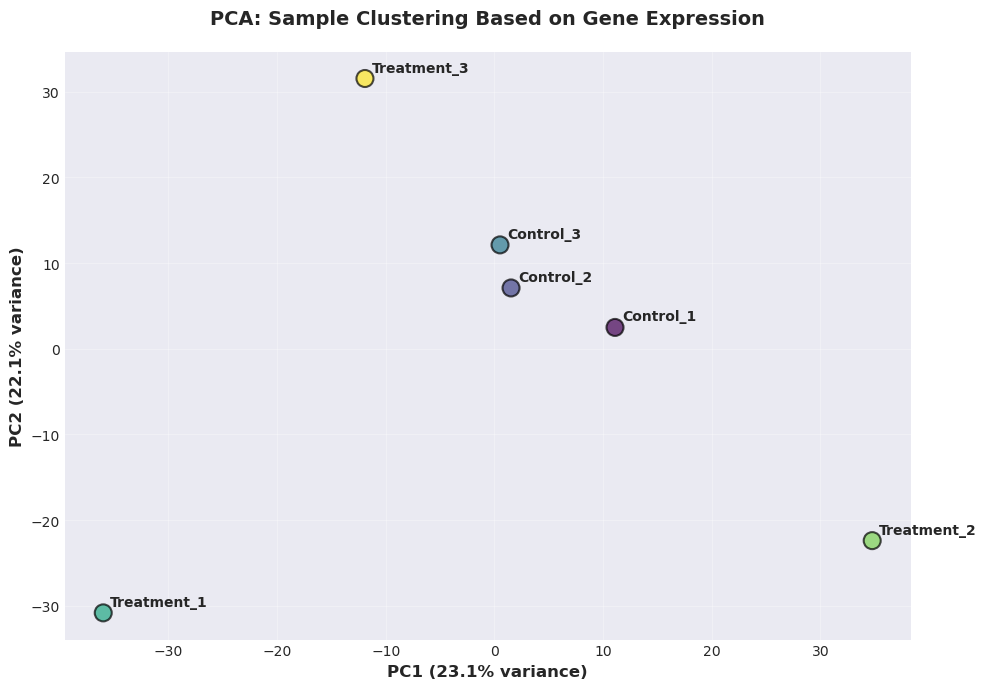


üí° PCA pokazuje jak pr√≥bki grupujƒÖ siƒô na podstawie profilu ekspresji gen√≥w


In [9]:
# PCA - Principal Component Analysis
# Redukcja wymiarowo≈õci: tysiƒÖce gen√≥w ‚Üí 2 komponenty g≈Ç√≥wne

# Standardizacja
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log2.T)  # Transpose: pr√≥bki jako wiersze

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Variance explained
var_exp = pca.explained_variance_ratio_

print("üî¨ PCA Analysis:")
print(f"  PC1 wyja≈õnia: {var_exp[0]*100:.2f}% wariancji")
print(f"  PC2 wyja≈õnia: {var_exp[1]*100:.2f}% wariancji")
print(f"  Razem: {sum(var_exp)*100:.2f}% ca≈Çkowitej wariancji")

# Wykres PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=150, 
            c=range(len(df.columns)), cmap='viridis', 
            edgecolor='black', linewidth=1.5, alpha=0.7)

# Annotacje (nazwy pr√≥bek)
for i, sample in enumerate(df.columns):
    plt.annotate(sample, (pca_result[i, 0], pca_result[i, 1]),
                fontsize=10, fontweight='bold',
                xytext=(5, 5), textcoords='offset points')

plt.xlabel(f'PC1 ({var_exp[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({var_exp[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
plt.title('PCA: Sample Clustering Based on Gene Expression', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nüí° PCA pokazuje jak pr√≥bki grupujƒÖ siƒô na podstawie profilu ekspresji gen√≥w")

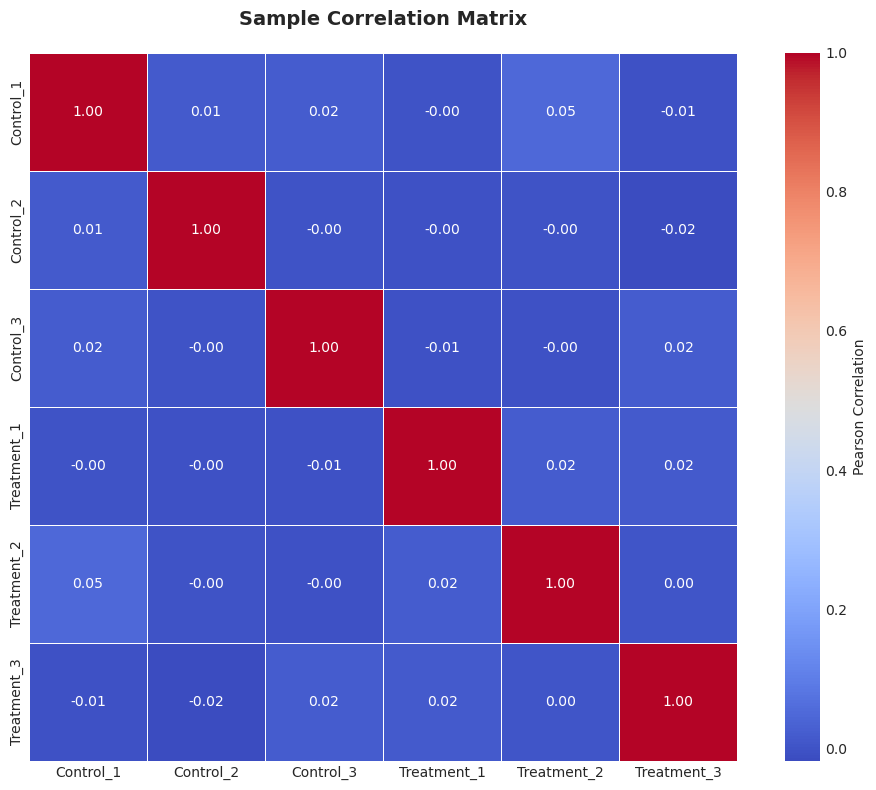

üîó Korelacja miƒôdzy pr√≥bkami:
  Warto≈õci bliskie 1.0 = podobne profile ekspresji
  Warto≈õci bliskie 0.0 = bardzo r√≥≈ºne profile


In [10]:
# Korelacja miƒôdzy pr√≥bkami
correlation = df_log2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={'label': 'Pearson Correlation'})
plt.title('Sample Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("üîó Korelacja miƒôdzy pr√≥bkami:")
print("  Warto≈õci bliskie 1.0 = podobne profile ekspresji")
print("  Warto≈õci bliskie 0.0 = bardzo r√≥≈ºne profile")

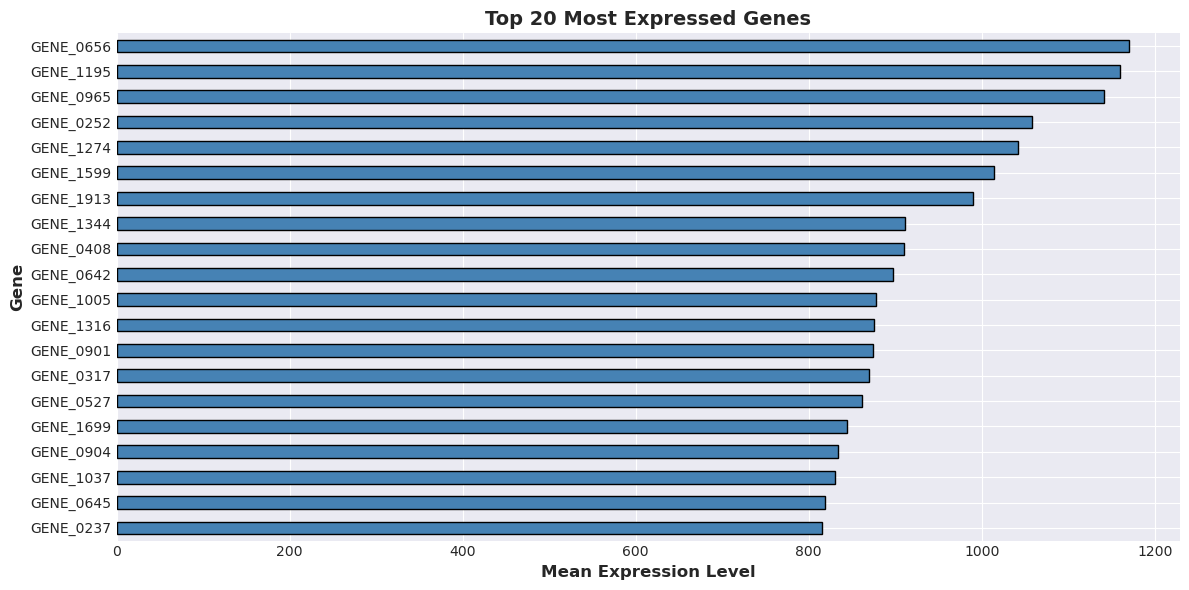

üß¨ Top 10 najbardziej ekspresowanych gen√≥w:
  1. GENE_0656: 1170.68
  2. GENE_1195: 1159.98
  3. GENE_0965: 1141.26
  4. GENE_0252: 1058.63
  5. GENE_1274: 1042.20
  6. GENE_1599: 1014.54
  7. GENE_1913: 989.98
  8. GENE_1344: 910.94
  9. GENE_0408: 909.68
  10. GENE_0642: 897.26


In [11]:
# Top 20 najbardziej ekspresowanych gen√≥w (≈õrednia ze wszystkich pr√≥bek)
mean_expression = df.mean(axis=1).sort_values(ascending=False)
top_20 = mean_expression.head(20)

plt.figure(figsize=(12, 6))
top_20.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Mean Expression Level', fontsize=12, fontweight='bold')
plt.ylabel('Gene', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Expressed Genes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("üß¨ Top 10 najbardziej ekspresowanych gen√≥w:")
for i, (gene, exp) in enumerate(top_20.head(10).items(), 1):
    print(f"  {i}. {gene}: {exp:.2f}")

In [12]:
print("=" * 70)
print("üìä PODSUMOWANIE ANALIZY - Breast Cancer Gene Expression")
print("=" * 70)

print(f"\nüìã Dataset:")
print(f"  ‚Ä¢ Liczba gen√≥w (po filtracji): {df.shape[0]}")
print(f"  ‚Ä¢ Liczba pr√≥bek: {df.shape[1]}")
print(f"  ‚Ä¢ Pr√≥bki: {', '.join(df.columns)}")

print(f"\nüß¨ Najwa≈ºniejsze geny:")
print(f"  ‚Ä¢ Najbardziej zmienny: {variances.index[0]} (var: {variances.iloc[0]:.2f})")
print(f"  ‚Ä¢ Najwy≈ºsza ekspresja: {mean_expression.index[0]} (mean: {mean_expression.iloc[0]:.2f})")

print(f"\nüìà PCA:")
print(f"  ‚Ä¢ PC1 + PC2 wyja≈õnia {sum(var_exp)*100:.2f}% wariancji")
print(f"  ‚Ä¢ Pr√≥bki grupujƒÖ siƒô wed≈Çug profilu ekspresji")

print(f"\nüîó Korelacja pr√≥bek:")
corr_mean = correlation.values[np.triu_indices_from(correlation.values, k=1)].mean()
print(f"  ‚Ä¢ ≈örednia korelacja: {corr_mean:.3f}")

print("\n" + "=" * 70)
print("‚úÖ ANALIZA ZAKO≈ÉCZONA!")
print("=" * 70)

print("\nüí° Nastƒôpne kroki:")
print("  1. Differential expression analysis (DESeq2 w R)")
print("  2. Gene Ontology enrichment")
print("  3. Pathway analysis (KEGG)")

üìä PODSUMOWANIE ANALIZY - Breast Cancer Gene Expression

üìã Dataset:
  ‚Ä¢ Liczba gen√≥w (po filtracji): 2000
  ‚Ä¢ Liczba pr√≥bek: 6
  ‚Ä¢ Pr√≥bki: Control_1, Control_2, Control_3, Treatment_1, Treatment_2, Treatment_3

üß¨ Najwa≈ºniejsze geny:
  ‚Ä¢ Najbardziej zmienny: GENE_0881 (var: 3.15)
  ‚Ä¢ Najwy≈ºsza ekspresja: GENE_0656 (mean: 1170.68)

üìà PCA:
  ‚Ä¢ PC1 + PC2 wyja≈õnia 45.20% wariancji
  ‚Ä¢ Pr√≥bki grupujƒÖ siƒô wed≈Çug profilu ekspresji

üîó Korelacja pr√≥bek:
  ‚Ä¢ ≈örednia korelacja: 0.006

‚úÖ ANALIZA ZAKO≈ÉCZONA!

üí° Nastƒôpne kroki:
  1. Differential expression analysis (DESeq2 w R)
  2. Gene Ontology enrichment
  3. Pathway analysis (KEGG)
